In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
%matplotlib inline



# 2️⃣ Dataset Overview

The Titanic dataset contains information about passengers aboard the Titanic ship.  
The goal is to explore the dataset to understand factors affecting **survival rates**.  

**Columns in the dataset include:**
- PassengerId
- Survived (0 = No, 1 = Yes)
- Pclass (Passenger class)
- Name
- Sex
- Age
- SibSp (Siblings/Spouses aboard)
- Parch (Parents/Children aboard)
- Ticket
- Fare
- Cabin
- Embarked (Port of embarkation)


In [4]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

# Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Insight:**  
We can see both categorical (Sex, Embarked) and numerical (Age, Fare) features.  
Some columns like Cabin may contain missing values.


In [5]:
# Check dataset shape
print("Dataset Shape:", df.shape)

# Info and missing values
df.info()
df.isnull().sum()

# Summary statistics
df.describe()

Dataset Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations:**
- `Age` and `Cabin` have missing values.
- `Embarked` has 2 missing values.
- Fare ranges from 0 to 512, skewed distribution.


In [16]:
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column safely
df.drop(columns='Cabin', inplace=True, errors='ignore')

# Confirm no missing values
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Insight:**  
After cleaning, the dataset is ready for analysis.  
We retained all important columns and handled missing values.


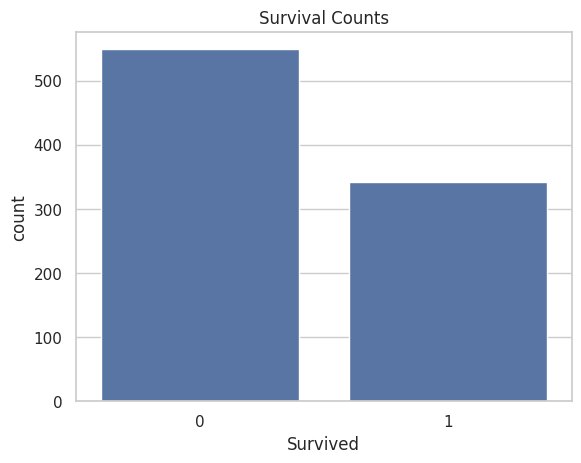

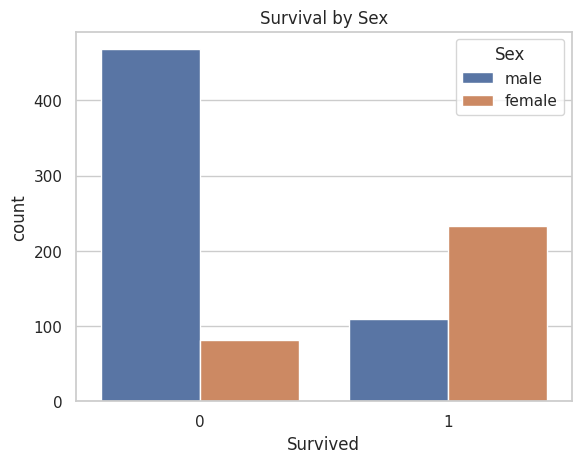

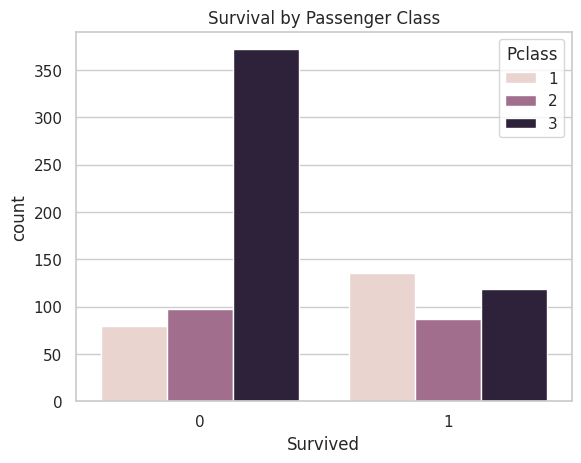

In [7]:
# Count of survivors
sns.countplot(x='Survived', data=df)
plt.title("Survival Counts")
plt.show()

# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Sex")
plt.show()

# Survival by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

**Insights from Visuals:**
- Females had a higher survival rate than males.  
- Passengers in 1st class survived more than 2nd and 3rd classes.


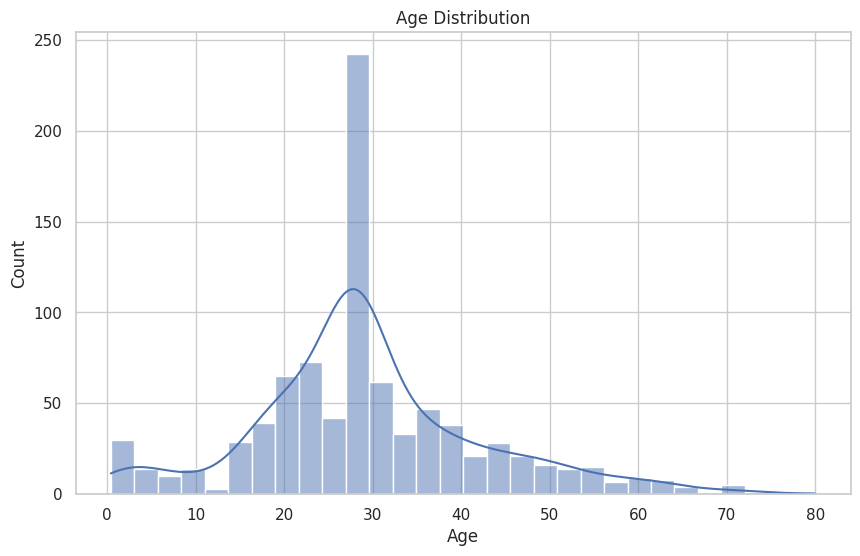

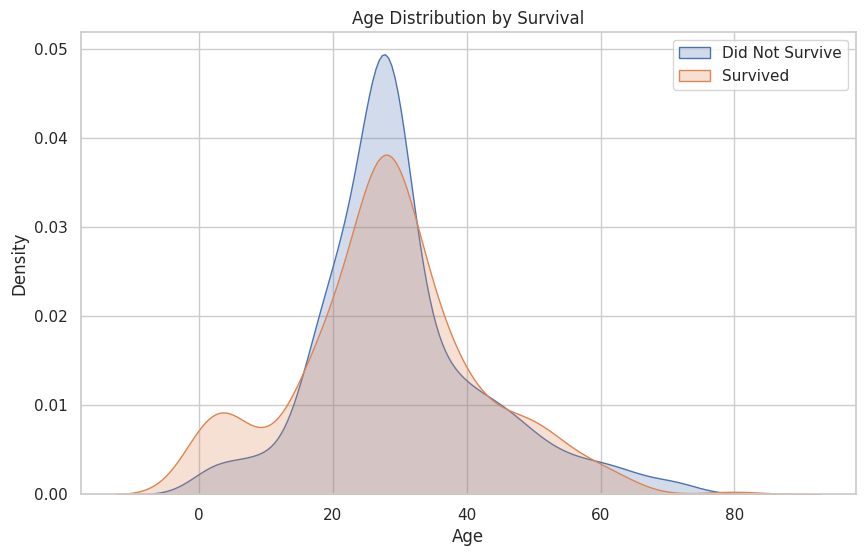

In [13]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Age vs Survival
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Survived']==0]['Age'], label='Did Not Survive', fill=True)
sns.kdeplot(df[df['Survived']==1]['Age'], label='Survived', fill=True)

plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()


**Observations:**
- Most passengers were between 20–40 years.  
- Children and young adults had a slightly higher survival rate.


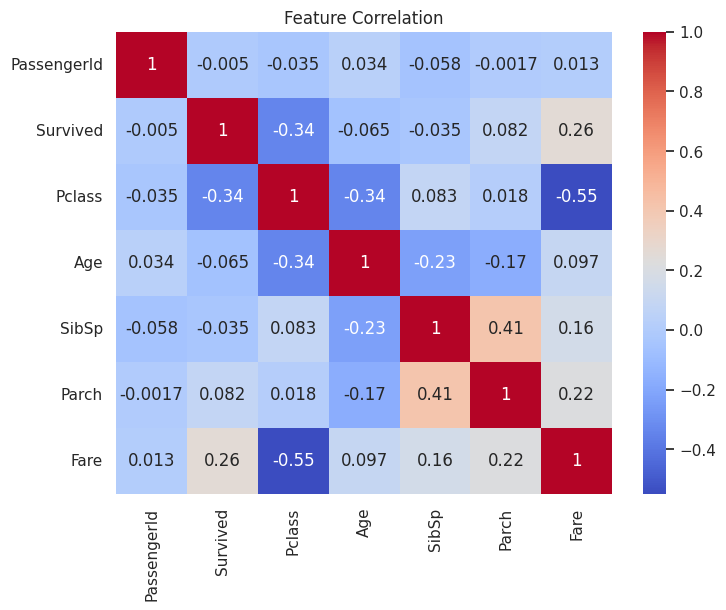

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

**Key Insights from Correlation:**
- Positive correlation between `Fare` and `Pclass` survival (higher fare, higher chance).  
- `SibSp` and `Parch` have low correlation with survival.  
- Sex (encoded as 0/1) is strongly correlated with survival.


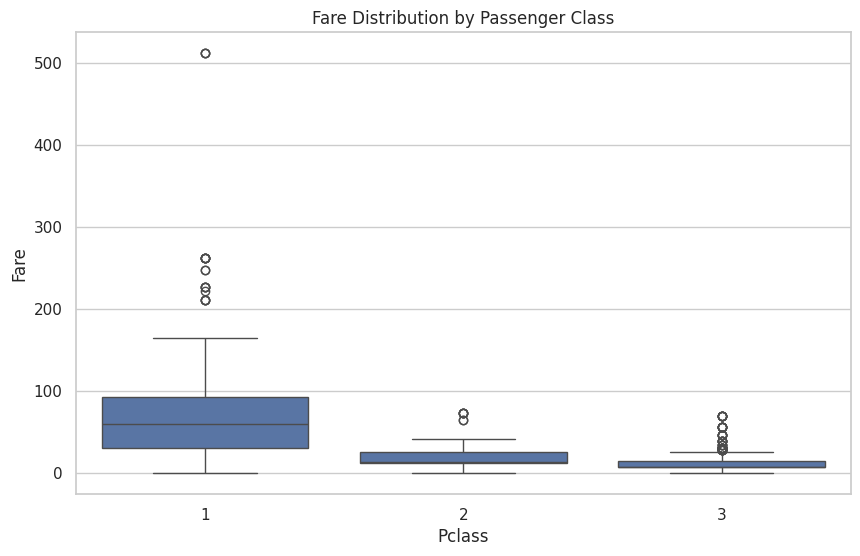

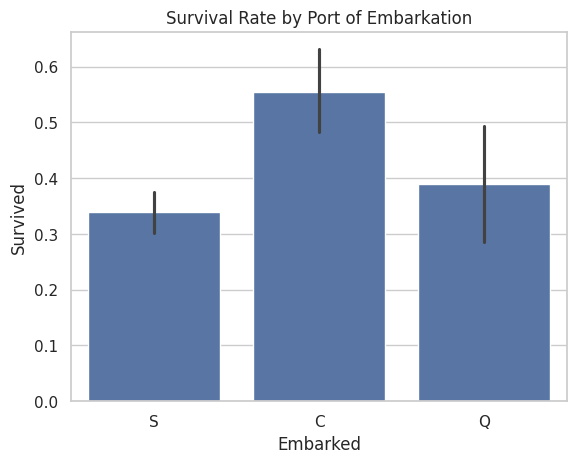

In [11]:
# Fare distribution by class
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Passenger Class")
plt.show()

# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Port of Embarkation")
plt.show()

**Insights:**
- 1st class passengers paid more and had higher survival.
- Embarkation port C had slightly higher survival rates than S and Q.


In [12]:
# Overall survival rate
overall_survival = df['Survived'].mean()
print(f"Overall Survival Rate: {overall_survival:.2f}")

# Group by Sex and Pclass
survival_stats = df.groupby(['Sex','Pclass'])['Survived'].mean()
survival_stats

Overall Survival Rate: 0.38


Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

**Final Observations:**
- Women and children had a higher chance of survival.  
- 1st class passengers survived more frequently.  
- Certain features (Sex, Pclass, Fare, Age) are most predictive for survival.  

✅ This EDA can now be used for further predictive modeling or feature engineering.
